In [50]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from google.colab import userdata

API_KEY = userdata.get("FOOTBALL_API_KEY")

if not API_KEY:
    raise ValueError("❌ API KEY no encontrada. Revisa Secrets.")

print("✅ API KEY cargada correctamente")

✅ API KEY cargada correctamente


In [51]:
url = "https://v3.football.api-sports.io/leagues"

headers = {
    "x-apisports-key": API_KEY
}

response = requests.get(url, headers=headers)

data = response.json()

print(data)


{'get': 'leagues', 'parameters': [], 'errors': [], 'results': 1217, 'paging': {'current': 1, 'total': 1}, 'response': [{'league': {'id': 4, 'name': 'Euro Championship', 'type': 'Cup', 'logo': 'https://media.api-sports.io/football/leagues/4.png'}, 'country': {'name': 'World', 'code': None, 'flag': None}, 'seasons': [{'year': 2008, 'start': '2008-06-07', 'end': '2008-06-29', 'current': False, 'coverage': {'fixtures': {'events': True, 'lineups': True, 'statistics_fixtures': False, 'statistics_players': False}, 'standings': False, 'players': True, 'top_scorers': True, 'top_assists': True, 'top_cards': True, 'injuries': False, 'predictions': True, 'odds': False}}, {'year': 2012, 'start': '2012-06-08', 'end': '2012-07-01', 'current': False, 'coverage': {'fixtures': {'events': True, 'lineups': True, 'statistics_fixtures': False, 'statistics_players': False}, 'standings': False, 'players': True, 'top_scorers': True, 'top_assists': True, 'top_cards': True, 'injuries': False, 'predictions': True

In [52]:
url_live = "https://v3.football.api-sports.io/fixtures?live=all"

response_live = requests.get(url_live, headers=headers)
data_live = response_live.json()

print("Partidos en vivo:", data_live["results"])

Partidos en vivo: 17


In [53]:
type(data)


dict

In [54]:
data.keys()

dict_keys(['get', 'parameters', 'errors', 'results', 'paging', 'response'])

In [55]:
type(data["response"])

list

In [56]:
len(data["response"])

1217

In [57]:
data["response"][0]



{'league': {'id': 4,
  'name': 'Euro Championship',
  'type': 'Cup',
  'logo': 'https://media.api-sports.io/football/leagues/4.png'},
 'country': {'name': 'World', 'code': None, 'flag': None},
 'seasons': [{'year': 2008,
   'start': '2008-06-07',
   'end': '2008-06-29',
   'current': False,
   'coverage': {'fixtures': {'events': True,
     'lineups': True,
     'statistics_fixtures': False,
     'statistics_players': False},
    'standings': False,
    'players': True,
    'top_scorers': True,
    'top_assists': True,
    'top_cards': True,
    'injuries': False,
    'predictions': True,
    'odds': False}},
  {'year': 2012,
   'start': '2012-06-08',
   'end': '2012-07-01',
   'current': False,
   'coverage': {'fixtures': {'events': True,
     'lineups': True,
     'statistics_fixtures': False,
     'statistics_players': False},
    'standings': False,
    'players': True,
    'top_scorers': True,
    'top_assists': True,
    'top_cards': True,
    'injuries': False,
    'predictions':

In [58]:
df_clean = pd.json_normalize(data['response'])
print("DF creado")
df_clean.head()


DF creado


,seasons,league.id,league.name,league.type,league.logo,country.name,country.code,country.flag
0,"[{'year': 2008, 'start': '2008-06-07', 'end': ...",4,Euro Championship,Cup,https://media.api-sports.io/football/leagues/4...,World,None,None
1,"[{'year': 2009, 'start': '2009-06-14', 'end': ...",21,Confederations Cup,Cup,https://media.api-sports.io/football/leagues/2...,World,None,None
2,"[{'year': 2010, 'start': '2010-08-06', 'end': ...",62,Ligue 2,League,https://media.api-sports.io/football/leagues/6...,France,FR,https://media.api-sports.io/flags/fr.svg
3,"[{'year': 2010, 'start': '2010-08-07', 'end': ...",61,Ligue 1,League,https://media.api-sports.io/football/leagues/6...,France,FR,https://media.api-sports.io/flags/fr.svg
4,"[{'year': 2010, 'start': '2010-07-30', 'end': ...",144,Jupiler Pro League,League,https://media.api-sports.io/football/leagues/1...,Belgium,BE,https://media.api-sports.io/flags/be.svg


In [59]:
df_clean = df_clean[[
    'league.id',
    'league.name',
    'league.type',
    'country.name'
]]

df_clean.head()


,league.id,league.name,league.type,country.name
0,4,Euro Championship,Cup,World
1,21,Confederations Cup,Cup,World
2,62,Ligue 2,League,France
3,61,Ligue 1,League,France
4,144,Jupiler Pro League,League,Belgium


In [60]:
df_clean.columns = ['league_id', 'league_name', 'league_type', 'country']

In [61]:
seasons_df = pd.json_normalize(
    data['response'],
    record_path='seasons',
    meta=[
        ['league', 'id'],
        ['league', 'name'],
        ['country', 'name']
    ]
)

seasons_df.head()

,year,start,end,current,coverage.fixtures.events,coverage.fixtures.lineups,coverage.fixtures.statistics_fixtures,coverage.fixtures.statistics_players,coverage.standings,coverage.players,coverage.top_scorers,coverage.top_assists,coverage.top_cards,coverage.injuries,coverage.predictions,coverage.odds,league.id,league.name,country.name
0,2008,2008-06-07,2008-06-29,False,True,True,False,False,False,True,True,True,True,False,True,False,4,Euro Championship,World
1,2012,2012-06-08,2012-07-01,False,True,True,False,False,False,True,True,True,True,False,True,False,4,Euro Championship,World
2,2016,2016-06-10,2016-07-10,False,True,True,True,True,True,True,True,True,True,False,True,False,4,Euro Championship,World
3,2020,2019-03-21,2021-07-11,False,True,True,True,True,True,True,True,True,True,False,True,False,4,Euro Championship,World
4,2024,2024-06-14,2024-07-14,True,True,True,True,True,True,True,True,True,True,False,True,False,4,Euro Championship,World


In [62]:
df_clean.info()
df_clean.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   league_id    1217 non-null   int64 
 1   league_name  1217 non-null   object
 2   league_type  1217 non-null   object
 3   country      1217 non-null   object
dtypes: int64(1), object(3)
memory usage: 38.2+ KB


,0
league_id,0
league_name,0
league_type,0
country,0


In [63]:
seasons_df.info()
seasons_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8018 entries, 0 to 8017
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   year                                   8018 non-null   int64 
 1   start                                  8018 non-null   object
 2   end                                    8018 non-null   object
 3   current                                8018 non-null   bool  
 4   coverage.fixtures.events               8018 non-null   bool  
 5   coverage.fixtures.lineups              8018 non-null   bool  
 6   coverage.fixtures.statistics_fixtures  8018 non-null   bool  
 7   coverage.fixtures.statistics_players   8018 non-null   bool  
 8   coverage.standings                     8018 non-null   bool  
 9   coverage.players                       8018 non-null   bool  
 10  coverage.top_scorers                   8018 non-null   bool  
 11  coverage.top_assi

,0
year,0
start,0
end,0
current,0
coverage.fixtures.events,0
coverage.fixtures.lineups,0
coverage.fixtures.statistics_fixtures,0
coverage.fixtures.statistics_players,0
coverage.standings,0
coverage.players,0


In [64]:
df_clean.to_csv('leagues.csv', index=False)
seasons_df.to_csv('seasons.csv', index=False)


ver estructura general

In [65]:
print("Resultados:", data["results"])
print("Errores:", data["errors"])

Resultados: 1217
Errores: []


In [66]:
# ================= PARTIDOS EN VIVO =================

url_live = "https://v3.football.api-sports.io/fixtures?live=all"

response_live = requests.get(url_live, headers=headers)

data_live = response_live.json()

print("Partidos en vivo:", data_live["results"])


Partidos en vivo: 17


ver primer partido si hay

In [67]:
if data_live["results"] > 0:

    partido = data_live["response"][0]

    home = partido["teams"]["home"]["name"]
    away = partido["teams"]["away"]["name"]

    goles_home = partido["goals"]["home"]
    goles_away = partido["goals"]["away"]

    estado = partido["fixture"]["status"]["long"]

    print(f"{home} {goles_home} - {goles_away} {away}")
    print("Estado:", estado)

else:
    print("No hay partidos en vivo ahora mismo.")


Haras El Hodood 1 - 1 Pharco
Estado: First Half


In [68]:
partidos = []

for match in data_live["response"]:

    goles_local = match["goals"]["home"]
    goles_visitante = match["goals"]["away"]

    # Si vienen como None → poner 0
    if goles_local is None:
        goles_local = 0

    if goles_visitante is None:
        goles_visitante = 0


    partidos.append({

        "liga": match["league"]["name"],
        "pais": match["league"]["country"],

        "local": match["teams"]["home"]["name"],
        "visitante": match["teams"]["away"]["name"],

        "goles_local": goles_local,
        "goles_visitante": goles_visitante,

        "minuto": match["fixture"]["status"]["elapsed"],

        "total_goles": goles_local + goles_visitante,

        "estado": match["fixture"]["status"]["long"]
    })

# FUERA del for
df_live = pd.DataFrame(partidos)
df_live.head()


,liga,pais,local,visitante,goles_local,goles_visitante,minuto,total_goles,estado
0,Premier League,Egypt,Haras El Hodood,Pharco,1,1,45,2,First Half
1,Pro League,Saudi-Arabia,Al-Fayha,Al Najma,1,0,30,1,First Half
2,Ligue 1,Burkina-Faso,SONABEL,Réal du Faso,0,0,19,0,First Half
3,Ligue 1,Burkina-Faso,AJEB,Salitas,0,0,15,0,First Half
4,Türkiye Kupası,Turkey,Kocaelispor,Beşiktaş,1,0,45,1,First Half


 Export Excel

In [69]:
df_live.to_excel("partidos_en_vivo.xlsx", index=False)
print("file done")

file done


In [70]:
df_live["total_goles"] = df_live["goles_local"] + df_live["goles_visitante"]


In [71]:
df_live.columns


Index(['liga', 'pais', 'local', 'visitante', 'goles_local', 'goles_visitante',
       'minuto', 'total_goles', 'estado'],
      dtype='object')

In [72]:
df_goles = df_live[df_live["total_goles"] >= 3]
print(df_goles)


                liga      pais             local           visitante  \
5             1. SNL  Slovenia          Aluminij  Olimpija Ljubljana   
11  Friendlies Clubs     World  Shakhtar Donetsk                Riga   

    goles_local  goles_visitante  minuto  total_goles       estado  
5             1                2      90            3  Second Half  
11            2                1      90            3  Second Half  


In [73]:
df_live.groupby("liga")["total_goles"].mean().sort_values(ascending=False)



,total_goles
liga,
1. SNL,3.000000
Iraqi League,2.000000
Friendlies Clubs,1.666667
Premier League,1.500000
Türkiye Kupası,1.000000
Pro League,1.000000
Stars League,0.500000
Elite One,0.500000
Cup,0.000000


Average goals per league

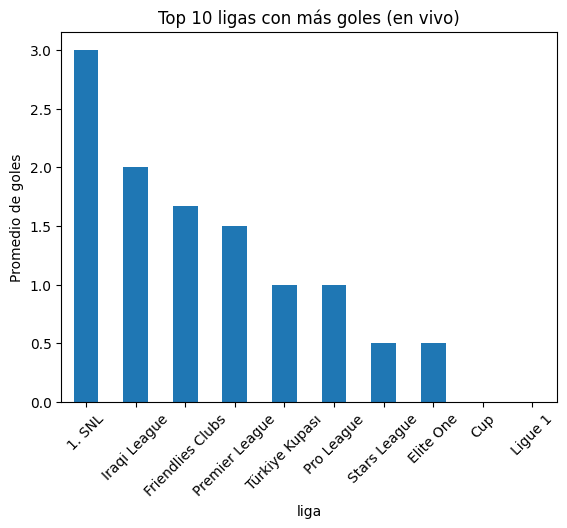

In [74]:
avg_goals = (
    df_live
    .groupby("liga")["total_goles"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
avg_goals.head(10).plot(kind="bar")
plt.title("Top 10 ligas con más goles (en vivo)")
plt.ylabel("Promedio de goles")
plt.xticks(rotation=45)
plt.show()


Goal distribution

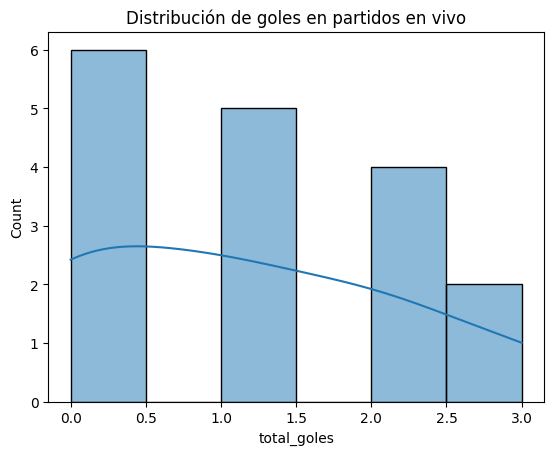

In [75]:
plt.figure()
sns.histplot(df_live["total_goles"], bins=6, kde=True)
plt.title("Distribución de goles en partidos en vivo")
plt.show()


% of matches with 3+ goals

In [76]:
pct = (df_live["total_goles"] >= 3).mean() * 100

print(f"{pct:.2f}% de partidos tienen 3+ goles")

11.76% de partidos tienen 3+ goles


In [77]:
def predict_over25(df):

    df["over25"] = df["total_goles"] >= 3

    prob = df["over25"].mean() * 100

    print(f"\nProbabilidad actual de +2.5 goles: {prob:.2f}%")

    candidates = df[
        (df["minuto"] >= 60) &
        (df["total_goles"] >= 2)
    ]

    print("\nPartidos con alta probabilidad:\n")
    print(candidates[[
        "liga","local","visitante","minuto","total_goles"
    ]])


In [78]:
predict_over25(df_live)


Probabilidad actual de +2.5 goles: 11.76%

Partidos con alta probabilidad:

                liga             local           visitante  minuto  \
5             1. SNL          Aluminij  Olimpija Ljubljana      90   
11  Friendlies Clubs  Shakhtar Donetsk                Riga      90   

    total_goles  
5             3  
11            3  


In [79]:
!rm -f historico_partidos.csv


In [80]:
file = "historico_partidos.csv"

cols = [
    "liga",
    "local",
    "visitante",
    "goles_local",
    "goles_visitante",
    "minuto",
    "total_goles"
]

df_save = df_live[cols].drop_duplicates()

if not os.path.exists(file):
    df_save.to_csv(file, index=False)
else:
    df_save.to_csv(file, mode="a", index=False, header=False)



In [81]:
cols = ["liga", "local", "visitante", "minuto", "total_goles"]

df_save = df_live[cols].drop_duplicates()

file = "historico_partidos.csv"

if not os.path.exists(file):
    df_save.to_csv(file, index=False)
else:
    df_save.to_csv(file, mode="a", index=False, header=False)


leer y renombrar columnas

In [82]:
df_hist = pd.read_csv(file)


df_hist.head()


,liga,local,visitante,goles_local,goles_visitante,minuto,total_goles
0,Premier League,Haras El Hodood,Pharco,1,1,45.0,2.0
1,Pro League,Al-Fayha,Al Najma,1,0,30.0,1.0
2,Ligue 1,SONABEL,Réal du Faso,0,0,19.0,0.0
3,Ligue 1,AJEB,Salitas,0,0,15.0,0.0
4,Türkiye Kupası,Kocaelispor,Beşiktaş,1,0,45.0,1.0


In [83]:
print("Columnas cargadas:")
print(df_hist.columns)


Columnas cargadas:
Index(['liga', 'local', 'visitante', 'goles_local', 'goles_visitante',
       'minuto', 'total_goles'],
      dtype='object')


In [84]:
# Columnas que deben ser numéricas
cols_numeric = [
    "goles_local",
    "goles_visitante",
    "minuto",
    "total_goles"
]
for col in cols_numeric:
    df_hist[col] = pd.to_numeric(df_hist[col], errors="coerce")

# Eliminar filas inválidas
df_hist = df_hist.dropna(subset=cols_numeric)

# Evitar división por cero
df_hist = df_hist[df_hist["minuto"] > 0]

# Convertir a int
df_hist["goles_local"] = df_hist["goles_local"].astype(int)
df_hist["goles_visitante"] = df_hist["goles_visitante"].astype(int)
df_hist["minuto"] = df_hist["minuto"].astype(int)
df_hist["total_goles"] = df_hist["total_goles"].astype(int)



In [85]:
df_hist["goles_local"] = pd.to_numeric(df_hist["goles_local"], errors="coerce")
df_hist["goles_visitante"] = pd.to_numeric(df_hist["goles_visitante"], errors="coerce")

df_hist = df_hist.dropna(subset=["goles_local","goles_visitante"])


In [86]:
df_live["minuto_ratio"] = df_live["minuto"] / 90
df_live["goles_ratio"] = df_live["total_goles"] / df_live["minuto"]


In [87]:
df_hist = df_hist[df_hist["minuto"] > 0]

df_hist["minuto_ratio"] = df_hist["minuto"] / 90
df_hist["goles_ratio"] = df_hist["total_goles"] / df_hist["minuto"]

df_hist["over25"] = df_hist["total_goles"] >= 3



In [88]:
print(df_hist.columns)

Index(['liga', 'local', 'visitante', 'goles_local', 'goles_visitante',
       'minuto', 'total_goles', 'minuto_ratio', 'goles_ratio', 'over25'],
      dtype='object')


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df_hist[["minuto","total_goles","minuto_ratio","goles_ratio"]]
y = df_hist["over25"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)



In [90]:
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, pred))

print("\nClassification Report:\n")
print(classification_report(y_test, pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, pred))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         3
        True       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Confusion Matrix:

[[3 0]
 [0 1]]


In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Average CV Score:", scores.mean())

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [1. 1. 1. 1. 1.]
Average CV Score: 1.0


In [92]:
df_hist.head()
df_hist.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 16
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   liga             17 non-null     object 
 1   local            17 non-null     object 
 2   visitante        17 non-null     object 
 3   goles_local      17 non-null     int64  
 4   goles_visitante  17 non-null     int64  
 5   minuto           17 non-null     int64  
 6   total_goles      17 non-null     int64  
 7   minuto_ratio     17 non-null     float64
 8   goles_ratio      17 non-null     float64
 9   over25           17 non-null     bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 1.3+ KB


In [93]:
import joblib

joblib.dump(model, "model_over25.pkl")

['model_over25.pkl']

In [94]:
def predict_ml(df, model):

    df = df.copy()
    cols = ["minuto","total_goles","minuto_ratio","goles_ratio"]

    for col in cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    df = df.dropna(subset=cols)

    if df.empty:
        print("⚠️ No hay datos válidos para predecir")
        return df

    X = df[cols]

    df["prob_over25"] = model.predict_proba(X)[:,1]

    return df.sort_values("prob_over25", ascending=False)


In [95]:
!rm -rf sample_data


In [96]:
!ls

historico_partidos.csv	model_over25.pkl       seasons.csv
leagues.csv		partidos_en_vivo.xlsx


In [97]:
!ls *.ipynb


ls: cannot access '*.ipynb': No such file or directory


In [99]:
!pwd
!ls -a


/content
.   .config		    leagues.csv       partidos_en_vivo.xlsx
..  historico_partidos.csv  model_over25.pkl  seasons.csv


In [100]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [101]:
!find /content/drive -name "*.ipynb"


/content/drive/MyDrive/Colab Notebooks/football_over25_prediction.ipynb.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb
/content/drive/MyDrive/Colab Notebooks/introduccion_colab_live_07b0ed82-599e-45a5-a89a-cbcdb23943bb.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled1.ipynb
/content/drive/MyDrive/Colab Notebooks/El array.ipynb
/content/drive/MyDrive/Colab Notebooks/Tipos de d atos.ipynb
/content/drive/MyDrive/Colab Notebooks/Dimensiones.ipynb
/content/drive/MyDrive/Colab Notebooks/creando_arrays.ipynb
/content/drive/MyDrive/Colab Notebooks/shape and reshape.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled2.ipynb
/content/drive/MyDrive/Colab Notebooks/COPY.ipynb
/content/drive/MyDrive/Colab Notebooks/conditions.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled3.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled4.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled5.ipynb
/content/drive/MyDrive/Colab Notebooks/Copy of Data_sport.ipynb
/content/drive/MyDriv

In [102]:
from google.colab import files
files.download("football_over25_prediction.ipynb.ipynb")


FileNotFoundError: Cannot find file: football_over25_prediction.ipynb.ipynb